In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train_df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
test_df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [87]:
test_df[numeric_cols] = imputer.transform(test_df[numeric_cols])
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])
test_df[encoded_cols] = encoder.transform(test_df[categorical_cols])

In [88]:
train_targets.info()

<class 'pandas.core.series.Series'>
Index: 1095 entries, 1023 to 1126
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1095 non-null   int64
dtypes: int64(1)
memory usage: 17.1 KB


In [89]:
test_inputs = test_df[numeric_cols + encoded_cols]
test_inputs

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MiscFeature_nan,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,0.202055,0.048246,0.444444,0.625,0.644928,0.183333,0.00000,0.082920,0.097693,0.115582,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.205479,0.060609,0.555556,0.625,0.623188,0.133333,0.06750,0.163536,0.000000,0.173801,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.181507,0.058566,0.444444,0.500,0.905797,0.800000,0.00000,0.140149,0.000000,0.058647,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.195205,0.040562,0.555556,0.625,0.913043,0.800000,0.01250,0.106662,0.000000,0.138699,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.075342,0.017318,0.777778,0.500,0.869565,0.700000,0.00000,0.046598,0.000000,0.435360,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.000000,0.002973,0.333333,0.750,0.710145,0.333333,0.00000,0.000000,0.000000,0.233733,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1455,0.000000,0.002776,0.333333,0.500,0.710145,0.333333,0.00000,0.044649,0.000000,0.125856,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1456,0.476027,0.087406,0.444444,0.750,0.637681,0.766667,0.00000,0.216867,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1457,0.140411,0.042726,0.444444,0.500,0.869565,0.700000,0.00000,0.059709,0.000000,0.246147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
price_df=train_df.drop(['Id','SalePrice','PoolQC'],axis=1)


In [12]:
price_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,0,4,2010,WD,Normal


In [13]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [14]:
input_cols=list(price_df.columns)[1:-1]
target_cols=list(train_df.columns)[-1]
inputs_df=price_df[input_cols].copy()
target_df=train_df[target_cols].copy()

In [15]:
numeric_cols=inputs_df.select_dtypes(include=['int64','float64']).columns.to_list()
categorical_cols=inputs_df.select_dtypes(include=['object']).columns.to_list()


In [16]:
missing_count=inputs_df[numeric_cols].isna().sum().sort_values(ascending=True)

In [17]:
from sklearn.impute import SimpleImputer

In [18]:
imputer=SimpleImputer(strategy = 'mean').fit(price_df[numeric_cols])
inputs_df[numeric_cols]=imputer.transform(inputs_df[numeric_cols])

In [19]:
inputs_df[numeric_cols].describe().loc[['min','max']]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
min,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0
max,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,1474.0,2336.0,...,1418.0,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0


In [20]:
inputs_df[numeric_cols]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,0.0,953.0,...,460.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0
1456,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,163.0,589.0,...,500.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0
1457,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,0.0,877.0,...,252.0,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0
1458,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,1029.0,0.0,...,240.0,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0


In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler=MinMaxScaler()
scaler.fit(price_df[numeric_cols])
inputs_df[numeric_cols]=scaler.transform(inputs_df[numeric_cols])

In [23]:
inputs_df[numeric_cols]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.000000,0.064212,...,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.50
1,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,0.000000,0.121575,...,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.363636,0.25
2,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,0.000000,0.185788,...,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.727273,0.50
3,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,0.000000,0.231164,...,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.090909,0.00
4,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,0.000000,0.209760,...,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.140411,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,0.407962,...,0.324401,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.636364,0.25
1456,0.219178,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,0.110583,0.252140,...,0.352609,0.407235,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.090909,1.00
1457,0.154110,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,0.000000,0.375428,...,0.177715,0.000000,0.109689,0.000000,0.0,0.0,0.0,0.16129,0.363636,1.00
1458,0.160959,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.008682,0.698100,0.000000,...,0.169252,0.427071,0.000000,0.202899,0.0,0.0,0.0,0.00000,0.272727,1.00


In [24]:

inputs_df[categorical_cols].nunique().sort_values(ascending=False)

Neighborhood    25
Exterior2nd     16
Exterior1st     15
SaleType         9
Condition1       9
RoofMatl         8
Condition2       8
HouseStyle       8
Functional       7
GarageType       6
Heating          6
BsmtFinType2     6
BsmtFinType1     6
Foundation       6
RoofStyle        6
LotConfig        5
GarageCond       5
GarageQual       5
FireplaceQu      5
Electrical       5
BldgType         5
HeatingQC        5
MSZoning         5
ExterCond        5
MiscFeature      4
Fence            4
ExterQual        4
BsmtExposure     4
KitchenQual      4
BsmtCond         4
LandContour      4
BsmtQual         4
LotShape         4
GarageFinish     3
MasVnrType       3
LandSlope        3
PavedDrive       3
CentralAir       2
Street           2
Alley            2
Utilities        2
dtype: int64

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='error')

In [27]:
encoder.fit(price_df[categorical_cols])

OneHotEncoder(sparse_output=False)

In [54]:
encoded_cols

['MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'Alley_Grvl',
 'Alley_Pave',
 'Alley_nan',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'N

In [55]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
inputs_df[encoded_cols]=encoder.transform(inputs_df[categorical_cols])

In [56]:
inputs_df

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscFeature_nan,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,RL,0.150685,0.033420,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,RL,0.202055,0.038795,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,RL,0.160959,0.046507,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,RL,0.133562,0.038561,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,RL,0.215753,0.060576,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,0.140411,0.030929,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1456,RL,0.219178,0.055505,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1457,RL,0.154110,0.036187,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1458,RL,0.160959,0.039342,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [57]:
price_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,0,4,2010,WD,Normal


In [58]:
from sklearn.model_selection import train_test_split

In [59]:
train_inputs,val_inputs,train_targets,val_targets=train_test_split(inputs_df[numeric_cols+encoded_cols],target_df,test_size=0.25,random_state=42)

In [60]:
train_targets.info()

<class 'pandas.core.series.Series'>
Index: 1095 entries, 1023 to 1126
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1095 non-null   int64
dtypes: int64(1)
memory usage: 17.1 KB


In [61]:
from sklearn.linear_model import Ridge

In [62]:

model=Ridge()

In [63]:
model.fit(train_inputs,train_targets)

Ridge()

In [64]:
y_pred=model.predict(train_inputs)

In [65]:
model.predict(val_inputs)

array([158710.21163489, 348528.76879195,  89119.36876176, 189671.55717484,
       344818.92083818,  61320.35376958, 248739.81551567, 148540.47692691,
        57536.83786641, 143117.62439371, 146071.86528264, 105106.80285037,
        92631.99686358, 225480.96940922, 176973.43128281, 133338.6785094 ,
       186985.15544259, 128020.92081614, 129044.82947022, 211238.10894139,
       161509.55240934, 203363.50350123, 181042.78342316, 130380.89826811,
       203040.16498801, 141979.80660257, 201554.88462324, 101578.76643942,
       171424.34572079, 211239.64312512, 137819.05923705, 274058.98309531,
       242910.91983738, 107372.69994492, 249192.63035507, 144616.34006543,
       129706.30488355, 203545.37694798, 321827.45797285, 111061.8579651 ,
       137655.45607624, 227284.04807935,  97580.24038286, 355648.90742741,
       135816.97232581, 144892.53643372, 106031.52139559, 137664.48871553,
       416308.53951218, 130320.18993579, 118743.25422824, 262332.27743735,
        96926.19516336, 2

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
rmse=mean_squared_error(train_targets,y_pred)

In [68]:
rmse

502694034.39522845

In [69]:
model.intercept_

-94586.65723002158

In [84]:
test_df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [85]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


# Machine learing approach

In [72]:
#putting it all together 
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR

warnings.filterwarnings('ignore')
# Identify input and target columns

input_cols=list(price_df.columns)[1:-1]
target_cols=list(train_df.columns)[-1]
inputs_df=price_df[input_cols].copy()
target_df=train_df[target_cols].copy()

# Identify numeric and categorical columns

numeric_cols=inputs_df.select_dtypes(include=['int64','float64']).columns.to_list()
categorical_cols=inputs_df.select_dtypes(include=['object']).columns.to_list()


# Impute and scale numeric columns
imputer = SimpleImputer().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])
scaler = MinMaxScaler().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(inputs_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
inputs_df[encoded_cols]=encoder.transform(inputs_df[categorical_cols])

# Create training and validation sets

train_inputs,val_inputs,train_targets,val_targets=train_test_split(inputs_df[numeric_cols+encoded_cols],target_df,test_size=0.25,random_state=42)
#training decision tree
model1=DecisionTreeRegressor(random_state=42)
model1.fit(train_inputs,train_targets)
train_pred=model1.predict(val_inputs)
train_pred
mse_rf=mean_squared_error(train_pred,val_targets)
print(train_pred)
print(mse_rf)


[158500. 410000. 110500. 133000. 285000.  81000. 183000. 148500.  81000.
 167500. 189950. 123000.  90000. 164990. 172400. 109000. 215000. 139400.
 108000. 214000. 115000. 235128. 174000. 110000. 230000. 181000. 227680.
 108000. 178000. 176000. 112500. 233000. 169000.  97000. 250000. 129500.
 115000. 213000. 290000. 115000. 112500. 268000. 103600. 440000. 156000.
 139000. 100000. 125500. 466500. 139000. 103600. 170000. 110000. 424870.
 140000. 187500. 188500. 142000. 132000. 124000.  79900. 177000. 325300.
 325000. 249700. 230000. 110000. 325624. 123600. 155000. 118964. 124000.
  97000. 102000. 501837. 181000. 290000. 260000. 139000. 126000.  89500.
  76000. 143250.  62383. 158000. 135000. 270000. 180500. 148000. 191000.
 145000. 165150. 138500. 294000.  85000. 186000. 129900. 148800. 279500.
 200000. 175000. 208500. 375000. 116900. 175000. 186500. 155000. 280000.
 169900. 211000.  55000. 123600. 154000. 135000. 226000. 105000. 120500.
 111000. 158000. 280000. 184000. 143000. 172400. 18

In [90]:
model1=DecisionTreeRegressor(random_state=42)
model1.fit(train_inputs,train_targets)
train_pred=model1.predict(test_inputs)
train_pred
##mse_rf=mean_squared_error(train_pred,val_targets)
print(train_pred)
##print(mse_rf)

[117500. 150000. 231500. ... 153000. 100000. 252678.]


In [91]:
model2=RandomForestRegressor(random_state=42,n_estimators=10,max_depth=20,max_features=0.25,)
model2.fit(train_inputs,train_targets)
trainDT_pred=model2.predict(val_inputs)
##mse_DT=mean_squared_error(trainDT_pred,val_targets)
print(trainDT_pred)
##print(mse_DT)

[142840.         335351.7        120245.         153828.18181818
 326306.1         92550.         214347.         144600.
  86988.3        116440.         150945.         126730.
 144052.8        199550.         179118.18181818 135737.5
 193665.         131020.         109720.         203340.
 167770.         222323.6        175615.2        118820.
 194404.1        175250.         192669.1        107280.
 178640.         198305.9        114500.         268109.
 197515.         108165.         251183.         155100.
 142878.4        215000.         288760.9        107428.3
 128830.         247275.         125355.         378971.7
 134428.5        161177.9        119500.         120670.
 444919.4        141850.         121940.         209100.
 114450.         328195.         148649.5        251850.
 193213.66666667 168290.         137033.3        114790.
  86300.         141330.         290360.         245019.1
 327917.2        216040.         118425.         315678.1
 129870.         1

In [92]:
model3=SVR(kernel='linear',C=100,degree=3,epsilon=0.1)
model3.fit(train_inputs,train_targets)
trainSV=model3.predict(val_inputs)
#mse_svm=mean_squared_error(trainSV,train_targets)


# Deep learning approach

In [93]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [74]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
model4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(10,activation='relu'),
  tf.keras.layers.Dense(1)
])

# Compile the model
model4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mse'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model 
history=model4.fit(train_inputs,train_targets, callbacks=[early_stopping], epochs=1000, verbose=0) 

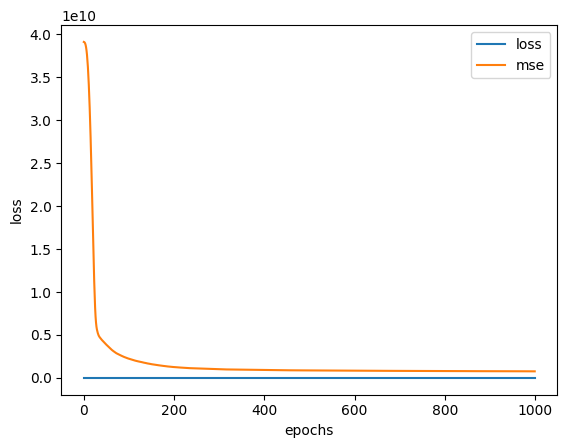

In [75]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [76]:
model4.evaluate(train_inputs,train_targets)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14461.4424 - mse: 900365184.0000  


[13658.384765625, 765157888.0]

In [94]:
y1=model4.predict(test_inputs)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


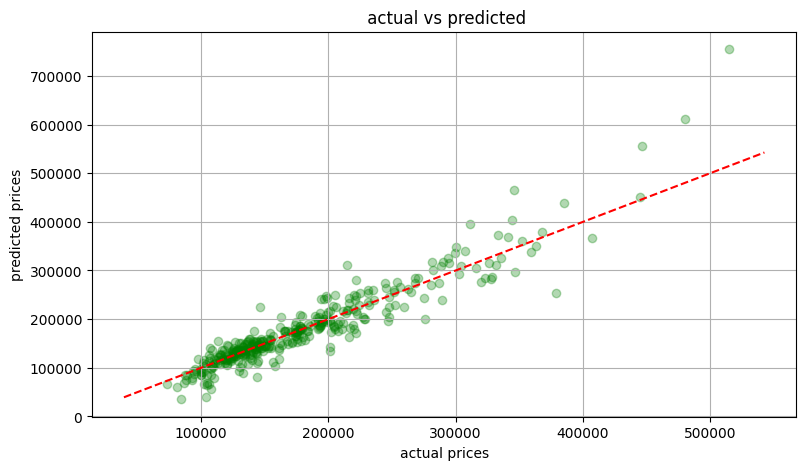

In [95]:

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(trainDT_pred,val_targets,alpha=0.3,color='green')
plt.plot([y1.min(),y1.max()],[y1.min(),y1.max()],'r--')
plt.xlabel('actual prices')
plt.ylabel('predicted prices')
plt.title(' actual vs predicted')
plt.grid(True)

In [79]:
submission_df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission_df

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [96]:
submission_df['SalePrice']=y1

In [81]:
submission_df

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [ ]:
submission_df.to_csv('submission5.csv', index=False)

In [ ]:
from sklearn.metrics import r2_score
r2_Dt=r2_score(trainDT_pred)
r2_Dt

In [82]:
!pip install flask

In [101]:
import joblib

# Save the model
joblib.dump(model4, 'model1.pkl')

['model1.pkl']

In [102]:
loaded_model = joblib.load('model.pkl')

In [107]:
!pip install pyngrok

In [110]:
from pyngrok import ngrok

# Replace with your actual ngrok AuthToken
ngrok.set_auth_token("2l1gQb22n8EvSgGBvKEPYkKYbvx_5LyLGhE4SoAh7KBGUeZYs")


In [111]:
from flask import Flask, request, jsonify
import joblib
import numpy as np
from pyngrok import ngrok

# Load your regression model
model = joblib.load('model1.pkl')

# Initialize the Flask app
app = Flask(__name__)

# Define a prediction route
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()  # Get the input JSON data
    features = np.array(data['input']).reshape(1, -1)  # Convert to appropriate shape
    prediction = model.predict(features)  # Predict using the model
    return jsonify({'prediction': prediction[0]})  # Return the prediction

if __name__ == "__main__":
    # Start ngrok
    public_url = ngrok.connect(5000)
    print(f" * ngrok tunnel available at: {public_url}")
    
    # Run the Flask app
    app.run(debug=True, port=5000)


 * ngrok tunnel available at: NgrokTunnel: "https://dea6-35-234-33-40.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: on


Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/conda/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.10/site-packages/traitlets/config/application.py", line 1042, in launch_instance
    app.initialize(argv)
  File "/opt/conda/lib/python3.10/site-packages/traitlets/config/application.py", line 113, in inner
    return method(app, *args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 654, in initialize
    self.init_sockets()
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 331, in init_sockets
    self.shell_port = self._bind_socket(self.shell_socket, self.shell_port)
  File "/opt/conda/lib/python3.10/site-packages/

SystemExit: 1

SyntaxError: invalid syntax (1235143822.py, line 1)